# Practice 1 - Manuel Isaac González Chi
# Machine Learning - UADY
## Polynomial Function fit to Sine Function with Linear Regression

### Importing libraries

In [827]:
import numpy as np
import matplotlib.pyplot as plt

### Generating Sine Function

In [828]:
# Generate sample data     
np.random.seed(0)
x = np.random.rand(100)
epsilon = np.random.rand(100) * 0.6 - 0.3  # Noise in the range [-0.3, 0.3]
x = np.sort(x)
y = np.sin(2 * np.pi * x) + epsilon


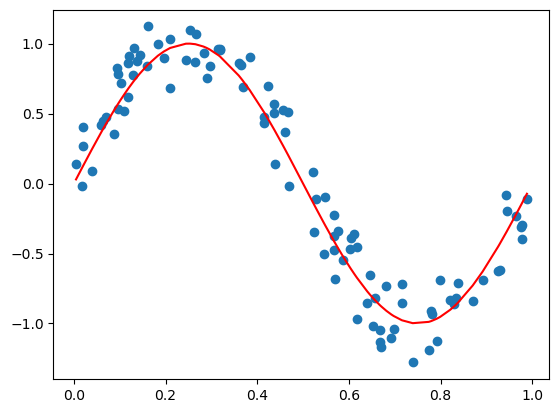

In [829]:
#Plot the data
plt.scatter(x, y)
plt.plot(np.sort(x), np.sin(2 * np.pi * np.sort(x)), color='red')  

### Defining Hyphothesis and Cost Functions

In [830]:
def hypothesis(X, theta):
    return theta.dot(X.T)

In [831]:
def cost_function(X, y, theta):
    predictions = theta.dot(X.T)
    cost = (1 / 2) * np.sum((predictions - y) ** 2)
    return cost

### Stochastic Gradient Descent

In [832]:
def sgd(X, y, learning_rate, iterations):
    np.random.seed(42)
    theta = np.random.uniform(size=X.shape[1]) - 0.5  # Initialize theta from uniform distribution
    m = len(y) # Number of data points
    print("Initial theta:", theta)
    error_history = []

    for epoch in range(iterations):
        for j in range(m):                             
            error = y[j] - hypothesis(X[j], theta)  # Calculate error for data point j          
            grad = error * X[j] # Gradient for data point j
            theta += learning_rate * grad # Update theta from gradient

        E_rms = np.sqrt(2 * cost_function(X, y, theta) / m) #Root Mean Square Error
        error_history.append(E_rms)

    print("Final E_RMS:", E_rms)
    print("Final theta:", theta)

    return theta, error_history
   

### Generating Input Vector with powers from 0 to D+1

In [833]:
D = 3  # Degree of the polynomial
X = np.vstack([x**d for d in range(D + 1)]).T # Feature matrix for polynomial terms
print("Feature matrix X shape:", X.shape)

Feature matrix X shape: (100, 4)


In [834]:
np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) #Normal Equation Solution

array([ -0.13743402,  11.71389401, -34.20882912,  22.73591177])

### Training Data and Plotting

In [835]:
theta, error_history = sgd(X, y, learning_rate=0.1, iterations=10000)

Initial theta: [-0.12545988  0.45071431  0.23199394  0.09865848]
Final E_RMS: 0.18372116916962672
Final theta: [ -0.04456044  10.5578185  -31.11755617  20.56264435]


### Final Parameters

The polynomial obtained using stochastic gradient descent is:

$$
p(x) = -0.04456044 + 10.5578185x - 31.11755617x^2 + 20.56264435x^3
$$

Additionally, the optimal learning rate found was:

$$
\alpha_{\text{optimal}} = 0.1
$$

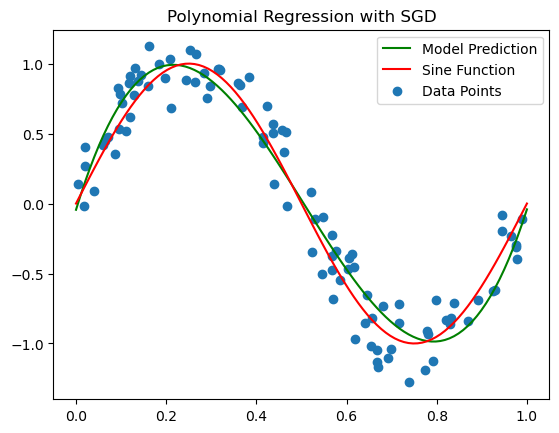

In [836]:
#Plot the predictions
X_original = np.linspace(0, 1, 100)
X_feat = np.vstack([X_original**d for d in range(D + 1)]).T
y_pred = hypothesis(X_feat, theta)
plt.plot(X_original, y_pred, color='green')  # Model prediction
plt.plot(X_original, np.sin(2 * np.pi * X_original), color='red')  # Original Sine function
plt.scatter(x, y)
plt.title('Polynomial Regression with SGD')
plt.legend(['Model Prediction', 'Sine Function', 'Data Points'])
plt.show()

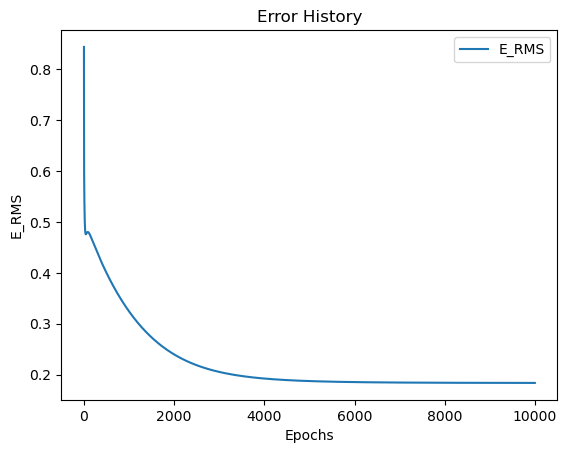

In [837]:
plt.plot(error_history)
plt.title('Error History')
plt.xlabel('Epochs')
plt.ylabel('E_RMS')
plt.legend(['E_RMS'])
plt.show()